# 기상 데이터 정제

In [ ]:
in_filePath = "./data/data.csv"
out_filePath = "./data/tem10y.csv"

In [33]:
#csv 파일 읽기
with open(in_filePath, "rt", encoding="EUC_KR") as f:
    lines = f.readlines()

In [34]:
#기존의 데이터를 분리해서 가공하기
lines2 = ["연,월,일,기온,품질,균질\n"]+lines[5:]
# 아래의 주석으로 해도 됨 하지만 list로 묶을 필요없이 map 객체를 바로 join 해도 작동한다.
# lines2 = list(map(lambda v : v.replace("/", ","), lines2)) 
lines2 = map(lambda v : v.replace("/", ","), lines2)
result = "".join(lines2).strip()
print(result)

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9,8,1
2006,1,17,8,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7,8,1
2006,2,18,4.4,8,1
2006,2,19,7,8,1
2006,2,20,6.4,8,1
2006,2,21,8,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,

In [35]:
#결과를 파일로 만들기
with open(out_filePath, "wt", encoding="utf-8") as f:
    f.write(result)

# 기온 평균 구하기 (일별)

In [40]:
#csv 읽어오기
import pandas as pd
df = pd.read_csv("./data/tem10y.csv")

In [47]:
# 날짜별 기온을 리스트에 넣기
md = {}
for i, row in df.iterrows():
    m, d, v = int(row["월"]), int(row["일"]), float(row["기온"])
    key = str(m)+"/"+str(d)                                       # key 값 생성
    if not (key in md) : md[key] = []                            # dictionary에 key값이 생성되지 않았다면 key:[] 쌍으로 생성한다.
    md[key] += [v]                                                # 값 append

In [60]:
# 날짜별 평균구하기
avs = {}
for key in md:
    v = avs[key] = sum(md[key])/ len(md[key])
    print(f"{key} : {v}")

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [61]:
# 특정 날짜의 평균 기온 출력 -> 11월 3일
avs["11/3"]

15.48181818181818

# 월별 기온 평균 구하기

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#CSV 파일 읽기
df = pd.read_csv("./data/tem10y.csv", encoding="utf-8")

In [5]:
# 월별 평균 구하기위해 데이터 프레임을 월로 그룹핑하고 그중에 기온 데이터를 가져온다.
g = df.groupby(["월"])["기온"]

In [16]:
# 그룹핑한 데이터 출력해서 확인하기
print(g.sum(), g.count())

월
1     2044.8
2     2052.2
3     3415.8
4     4778.9
5     6686.3
6     7439.8
7     9010.0
8     9509.5
9     8038.9
10    6531.9
11    4449.9
12    2950.7
Name: 기온, dtype: float64 월
1     341
2     311
3     341
4     330
5     341
6     330
7     341
8     341
9     330
10    341
11    330
12    341
Name: 기온, dtype: int64


In [19]:
# 월별 온도 평균 구하기
gg = g.sum() / g.count()
print(gg)

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


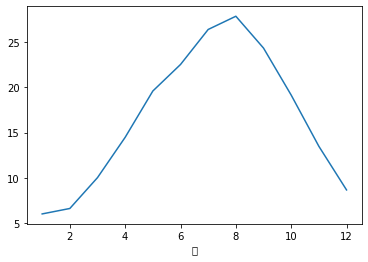

In [23]:
gg.plot()
plt.savefig("tem-month-avg.png")
plt.show()

# 기온이 30도가 넘는날 구하기

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#파일 읽기
df = pd.read_csv("./data/tem10y.csv", encoding="utf-8")

In [33]:
#온도가 30도 넘는 데이터 확인하기
hot_bool = df["기온"] > 30

In [37]:
#데이터 추출하기
hot_date = df[hot_bool]

In [38]:
#연별로 세기
cnt = hot_date.groupby(["연"])["연"].count()
print(cnt)

연
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 연, dtype: int64


C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)


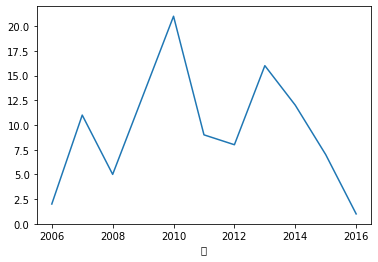

In [39]:
cnt.plot()
plt.savefig("tem-over30.png")
plt.show()

# 회귀분석으로 내일 기온 예측하기

In [41]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# 기온 데이터 읽어들이기
df = pd.read_csv("./data/tem10y.csv", encoding="utf-8")

In [76]:
# 데이터를 학습과 테스트로 분리하기
train_year = df["연"] <= 2015
test_year = df["연"] >= 2016
interval = 6
df[train_year]["기온"].head(30)

0      3.6
1      4.0
2      3.7
3      4.0
4      3.6
5      2.1
6      2.8
7      4.2
8      3.7
9      4.3
10     6.1
11     6.1
12     4.0
13     6.6
14    10.7
15     9.0
16     8.0
17     5.6
18     4.2
19     4.0
20     1.3
21     3.1
22     2.5
23     4.4
24     5.5
25     6.0
26     6.8
27     5.5
28     6.0
29     8.4
Name: 기온, dtype: float64

In [70]:
# 과거 6일의 데이터를 기반으로 학습할 데이터 만들기
def make_data(data):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return(x, y)

In [86]:
# 학습데이터 나누기
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])
print(train_x)

[[3.6, 4.0, 3.7, 4.0, 3.6, 2.1], [4.0, 3.7, 4.0, 3.6, 2.1, 2.8], [3.7, 4.0, 3.6, 2.1, 2.8, 4.2], [4.0, 3.6, 2.1, 2.8, 4.2, 3.7], [3.6, 2.1, 2.8, 4.2, 3.7, 4.3], [2.1, 2.8, 4.2, 3.7, 4.3, 6.1], [2.8, 4.2, 3.7, 4.3, 6.1, 6.1], [4.2, 3.7, 4.3, 6.1, 6.1, 4.0], [3.7, 4.3, 6.1, 6.1, 4.0, 6.6], [4.3, 6.1, 6.1, 4.0, 6.6, 10.7], [6.1, 6.1, 4.0, 6.6, 10.7, 9.0], [6.1, 4.0, 6.6, 10.7, 9.0, 8.0], [4.0, 6.6, 10.7, 9.0, 8.0, 5.6], [6.6, 10.7, 9.0, 8.0, 5.6, 4.2], [10.7, 9.0, 8.0, 5.6, 4.2, 4.0], [9.0, 8.0, 5.6, 4.2, 4.0, 1.3], [8.0, 5.6, 4.2, 4.0, 1.3, 3.1], [5.6, 4.2, 4.0, 1.3, 3.1, 2.5], [4.2, 4.0, 1.3, 3.1, 2.5, 4.4], [4.0, 1.3, 3.1, 2.5, 4.4, 5.5], [1.3, 3.1, 2.5, 4.4, 5.5, 6.0], [3.1, 2.5, 4.4, 5.5, 6.0, 6.8], [2.5, 4.4, 5.5, 6.0, 6.8, 5.5], [4.4, 5.5, 6.0, 6.8, 5.5, 6.0], [5.5, 6.0, 6.8, 5.5, 6.0, 8.4], [6.0, 6.8, 5.5, 6.0, 8.4, 7.1], [6.8, 5.5, 6.0, 8.4, 7.1, 5.7], [5.5, 6.0, 8.4, 7.1, 5.7, 7.8], [6.0, 8.4, 7.1, 5.7, 7.8, 6.0], [8.4, 7.1, 5.7, 7.8, 6.0, 1.6], [7.1, 5.7, 7.8, 6.0, 1.6, 1.9], [

In [80]:
# 선형 회귀분석하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)
pre_y = lr.predict(test_x)

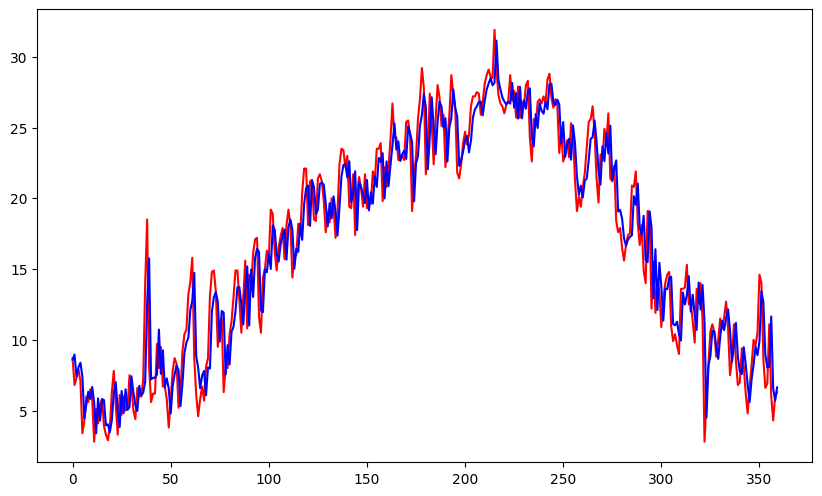

In [81]:
#결과를 그래프로 그래기
plt.figure(figsize=(10,6), dpi=100)
plt.plot(test_y, c="r")
plt.plot(pre_y, c="b")
plt.savefig("weather-tem-lr.png")
plt.show()

In [89]:
# 실행 결과 평가하기
dff_y = abs(pre_y - test_y)
print("average=", sum(dff_y) / len(dff_y))
print("max=", max(dff_y))

average= 1.6640684971954247
max= 8.471949619908472
